**Nom et Prénom :** AKOTENOU Généreux 

(Ce mini-projet peut être faire seul ou en binôme)

# Mini projet :  Méthode de gradient à pas spectral
----
Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.

N.B: N'hésitez pas à diviser vos codes en plusieurs cellules quand c'est possible pour faciliter leurs lectures et éxecutions.

----
On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

**Etape 1**

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas fixe) :

\begin{equation}
u^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}


> Modifier cet algorithme de sorte à ce que le pas $\rho_k$ soit donné par l'une des deux variantes, dites de Barzilaï et Borwein :

$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad 
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}; 
\quad 
\text{ pour } k\geq 1
$$
Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul du vecteur $u^{(1)}$ avec un pas initial $\rho_0$. A vous de choisir ce premier pas $\rho_0$ comme vous voulez.


In [1]:
# Importation des librairies

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Example de function J : Toute nos fonction sivent ce formalisme,
# 'grad' pour le gradien ∇𝐽(𝑢) et 'val' pour la valeur J(u)

def J(u):
    return {'grad': 1, 'val': 1}

In [3]:
# implémenter l'algorithme BB1 

def gradient_bb1_variant(J, pas, N=10, get_result=False):
    """
    Algorithme de descente de gradent utilisant la variante BB1
    params: J   -> cout et function de gradient
            pas -> pas initial p0
            N   -> nombre de variables d'optimisation
            get_result -> Permet de recuperer un retour de la fonction
    Output: (cost, u(solution_optimale), k(itération))
    """
    
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # Valeurs initiales
    u0   = np.zeros(N)
    uk   = u0
    uk_1 = u0
    k = 0
    cost = []

    # Itération de GF
    while True:
        gradient = J(uk)['grad']
        cost.append(J(uk)['val'])
        
        if np.linalg.norm(gradient) < eps or k == Kmax:
            break
        
        # Variante 1 du pas a partir de l'itération 1
        if k >= 1:
            sk_1 = uk - uk_1
            yk_1 = J(uk)['grad'] - J(uk_1)['grad']
            pas = np.dot(sk_1, sk_1) / np.dot(yk_1, sk_1)
            
        uk_1 = uk
        uk = uk - (pas*gradient)
        k += 1
        
    # Arret
    print(f"[BB1] - Itération: {k}\t - Vecteur u*: {uk}\n")
    if get_result:
        return (cost, uk, k)

In [4]:
# implémenter l'algorithme BB2

def gradient_bb2_variant(J, pas, N=10, get_result=False):
    """
    Algorithme de descente de gradent utilisant la variante BB2
    params: J   -> cout et function de gradient
            pas -> pas initial p0
            N   -> nombre de variables d'optimisation
            get_result -> Permet de recuperer un retour de la fonction
    Output: (cost, u(solution_optimale), k(itération))
    """
    
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # Valeurs initiales
    u0   = np.zeros(N)
    uk   = u0
    uk_1 = u0
    k = 0
    cost = []

    # Itération de GF
    while True:
        gradient = J(uk)['grad']
        cost.append(J(uk)['val'])
        
        if np.linalg.norm(gradient) < eps or k == Kmax:
            break
        
        # Variante 2 du pas a partir de l'itération 1
        if k >= 1:
            sk_1 = uk - uk_1
            yk_1 = J(uk)['grad'] - J(uk_1)['grad']
            pas = np.dot(sk_1, yk_1) / np.dot(yk_1, yk_1)
            
        uk_1 = uk 
        uk = uk - (pas*gradient)
        k += 1
        
    # Arret
    print(f"[BB2] - Itération: {k}\t - Vecteur u*: {uk}\n")
    if get_result:
        return (cost, uk, k)

----
**Etape 2**

> Effectuer les tests de validation pour les fonctions quadratiques suivantes ($N=10$): 

$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$


In [5]:
# Resolution

For *J1* we have Gradient: $\nabla J_1(v)$ = 2($v_i$ - 1) Solution: $ V^* = \begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} $ and for *J2* we have Gradient: $\nabla J_2(v)$ = 2($v_i$ - i) Solution: $ V^* = \begin{bmatrix} 1 \\ 2 \\ \vdots \\ N-1 \\ N \end{bmatrix} $

In [6]:
# Fonction J1 et J2

def J1 (v): 
    N = len(v)
    ones = np.ones(N)
    return {'val': np.dot(v-ones,v-ones), 'grad': 2*(v-ones)}

def J2 (v):
    N = len(v)
    i = np.arange(1, N+1)
    return {'val': np.dot(v-i,v-i), 'grad': 2*(v-i)}

In [7]:
# Test J1
# Resultat attendus: u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

gradient_bb1_variant(J1, pas=0.8, N=10)
gradient_bb2_variant(J1, pas=0.8, N=10)

[BB1] - Itération: 2	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[BB2] - Itération: 2	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



In [8]:
# Test J2
# Resultat attendus: u*: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

gradient_bb1_variant(J2, pas=0.8, N=10)
gradient_bb2_variant(J2, pas=0.8, N=10)

[BB1] - Itération: 2	 - Vecteur u*: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

[BB2] - Itération: 2	 - Vecteur u*: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]



----
**Etape 3**

On considère les fonctions suivantes (en dimension $N$): 

$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad \quad \quad 
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$

avec $f=(1,\ldots,1)$ et la matrice $A = {\rm tridiag}[-1, 2, -1]$ et la fonction de Rosenbrock 

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

> Minimiser les fonctions $J_5$, $J_6$  et $J_R$ par BB1 et par BB2 (pour $N=10, 20, 40$), et comparer les performances de ces deux variantes en traçant sur un même graphique les courbes BB1 et BB2 de $J(u^{(k)})$ en fonction des itérations $k$.

In [9]:
# Résolution

For *J5* we have $\nabla J_5(v)$ = <A,v> -f +2v; for *J6* we have $\nabla J_6(v)$ = <A,v> -f +$4v^3$ and for *JR* we have Gradient: $\nabla J_R(v) = \begin{bmatrix} \frac{\partial J_i}{\partial v_i} = 2(v_i - 1) - 4v_i(v_{i+1} - v_i^2) \\  \frac{\partial J_i}{\partial v_{i+1}} = 2(v_{i+1} - v_i^2) \end{bmatrix} $

In [10]:
# Fonction J5, J6, JR

def J5(v):
    N = len(v)
    A = 2*np.eye(N) + np.diag(-np.ones(N-1), -1) + np.diag(-np.ones(N-1), 1) 
    f = np.ones(N)
    return {
        'val': 0.5 * np.dot(np.dot(A, v), v) - np.dot(f, v) + np.sum(v**2), 
        'grad': np.dot(A, v) - f + 2*(v)
    }

def J6(v):
    N = len(v)
    A = 2*np.eye(N) + np.diag(-np.ones(N-1), -1) + np.diag(-np.ones(N-1), 1) 
    f = np.ones(N)
    return {
        'val': 0.5 * np.dot(v, np.dot(A, v)) - np.dot(f, v) + np.sum(v**4), 
        'grad': np.dot(A, v) - f + 4*(v**3)
    }


def JR(v):
    v = np.array(v)
    N = len(v)
    ones = np.ones(N-1)

    # JR Values
    vect1 = v[1:] - (v[:-1]*v[:-1])
    vect2 = v[:-1] - ones
    values = np.dot(vect1, vect1) + np.dot(vect2, vect2)

    # JR Gradient
    vect1 = 2*(v[:-1] - ones) - 4*v[:-1]*(v[1:] - v[:-1]**2)
    vect2 = 2*(v[1:] - v[:-1]**2)
    gradient = np.append(vect1, 0) + np.insert(vect2, 0, 0)

    return {
        'val': values, 
        'grad': gradient
    }

In [11]:
# MINIMISATION DE J5

print("✓ MINIMISATION DE J5\n")
gradient_bb1_variant(J5, pas=0.8, N=10)
gradient_bb2_variant(J5, pas=0.8, N=10)

✓ MINIMISATION DE J5

[BB1] - Itération: 16	 - Vecteur u*: [0.36602452 0.46409808 0.49036777 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036777 0.46409808 0.36602452]

[BB2] - Itération: 15	 - Vecteur u*: [0.36602453 0.46409808 0.49036779 0.49737303 0.49912435 0.49912435
 0.49737303 0.49036779 0.46409808 0.36602453]



In [12]:
# MINIMISATION DE J6

print("✓ MINIMISATION DE J6\n")
gradient_bb1_variant(J6, pas=0.8, N=10)
gradient_bb2_variant(J6, pas=0.8, N=10)

✓ MINIMISATION DE J6

[BB1] - Itération: 14	 - Vecteur u*: [0.522072   0.61332607 0.62743683 0.62957732 0.62989401 0.62989401
 0.62957732 0.62743683 0.61332607 0.522072  ]

[BB2] - Itération: 14	 - Vecteur u*: [0.522072   0.61332607 0.62743683 0.62957732 0.62989401 0.62989401
 0.62957732 0.62743683 0.61332607 0.522072  ]



In [13]:
# MINIMISATION DE JR

print("✓ MINIMISATION DE JR\n")
gradient_bb1_variant(JR, pas=0.8, N=10)
gradient_bb2_variant(JR, pas=0.8, N=10)

✓ MINIMISATION DE JR

[BB1] - Itération: 62	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[BB2] - Itération: 70	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999978]



In [14]:
# Analyse comparative des variantes BB1 et BB2
# Cette function générique peut etre appeler avec divers fonction J en argument pour les differents plots

def performance_plot(title, J, N=10, pas=0.8):
    cost1, u1, k1 = gradient_bb1_variant(J, pas, N, get_result=True)
    cost2, u2, k2 = gradient_bb2_variant(J, pas, N, get_result=True)
    k = min(k1, k2)
    
    # Plot
    plt.plot([i for i in range(k)], cost1[:k], color='blue', label=f'Variante BB1, p0={pas}')
    plt.plot([i for i in range(k)], cost2[:k], "--", color='red',  label=f'Variante BB2, p0={pas}')
    plt.xlabel('Itérations')
    plt.ylabel('Cout')
    plt.title(title)
    plt.legend()
    plt.show()

[BB1] - Itération: 16	 - Vecteur u*: [0.36602452 0.46409808 0.49036777 0.49737303 0.49912434 0.49912434
 0.49737303 0.49036777 0.46409808 0.36602452]

[BB2] - Itération: 15	 - Vecteur u*: [0.36602453 0.46409808 0.49036779 0.49737303 0.49912435 0.49912435
 0.49737303 0.49036779 0.46409808 0.36602453]



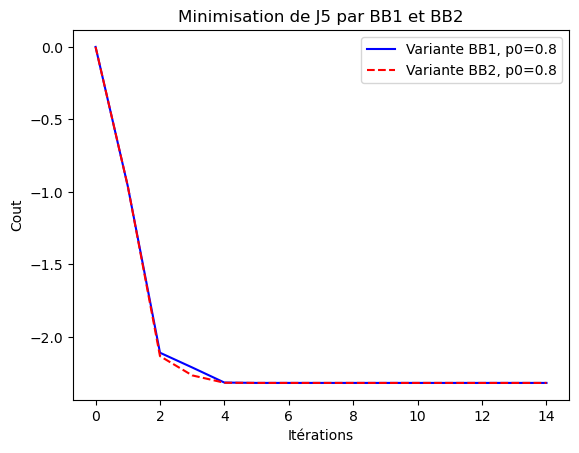

In [15]:
performance_plot("Minimisation de J5 par BB1 et BB2", J5, pas=0.8)

[BB1] - Itération: 14	 - Vecteur u*: [0.522072   0.61332607 0.62743683 0.62957732 0.62989401 0.62989401
 0.62957732 0.62743683 0.61332607 0.522072  ]

[BB2] - Itération: 14	 - Vecteur u*: [0.522072   0.61332607 0.62743683 0.62957732 0.62989401 0.62989401
 0.62957732 0.62743683 0.61332607 0.522072  ]



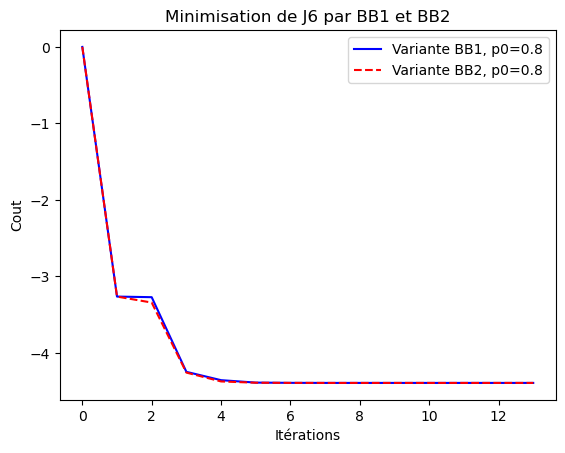

In [16]:
performance_plot("Minimisation de J6 par BB1 et BB2", J6, pas=0.8)

[BB1] - Itération: 62	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[BB2] - Itération: 70	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999978]



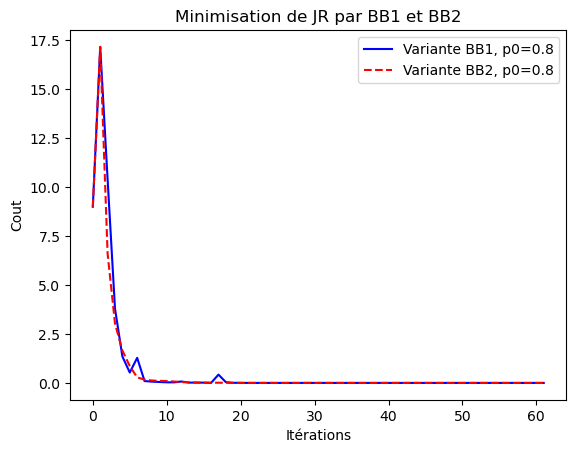

In [17]:
performance_plot("Minimisation de JR par BB1 et BB2", JR, pas=0.8)

**Etape 4**

> Comparer pour la fonction $J_R$ les performances des méthodes BB1 (ou BB2) et de l'algorithme NLCG (Fletcher-Reeves à pas constant) développé en TP2 : Comme avant, cette comparaison doit être faite en traçant les courbes de $J(u^{(k)})$ en fonction des itérations $k$ pour les différents algorithmes. 

> Refaire la même chose pour la fonction $J_H$ (du TP1).

On rappelle que $J_H$ est donnée par $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$.

In [18]:
## ALgorithme NLGC

def gradient_nlgc_variant(J, pas, N=10, get_result=False):
    """
    Algorithme de descente de gradent utilisant la variante Fletcher-Reeves
    params: J   -> cout et function de gradient
            pas -> pas initial p0
            N.  -> nombre de variables d'optimisation
            get_result -> Permet de recuperer un retour de la fonction
    Output: (cost, u(solution_optimale), k(itération))
    """
    
    eps = 1.e-7     # tolerance sur la norme du gradient
    Kmax = 1500     # nombre max d'iterations

    # First guess : u0
    u = np.zeros(N)
    k = 0
    cost = []

    d0 = J(u)['grad']
    while True:
        Gk = J(u)['grad']
        u = u - (pas*d0)
        Gk1 = J(u)['grad']

        be_k = np.dot(Gk1, Gk1) / np.dot(Gk, Gk)
        d0 = Gk1 + (be_k*d0)
        cost.append(J(u)['val'])

        k += 1
        if np.linalg.norm(d0) < eps or k == Kmax:
            break
        
    # Arret
    print(f"[NLCG] - Itération: {k}\t - Vecteur u*: {u}\n")
    if get_result:
        return (cost, u, k)

In [19]:
# Analyse comparative des variantes BB1 et BB2 et Fletcher-Reeves

def performance_plot_v2(J, N=10, pas_b1=0.8, pas_b2=0.8, pas_nlgc=0.1, title="titre plot"):
    cost1, u1, k1 = gradient_bb1_variant(J, pas_b1, N, get_result=True)
    cost2, u2, k2 = gradient_bb2_variant(J, pas_b2, N, get_result=True)
    cost3, u3, k3 = gradient_nlgc_variant(J, pas_nlgc, N, get_result=True)
    k = min(k1, k2, k3)
    #k = k1
    
    # Plot
    plt.plot([i for i in range(k)], cost1[:k], "-b",  label=f'Variante BB1,  p0={pas_b1}')
    plt.plot([i for i in range(k)], cost2[:k], "--r", label=f'Variante BB2,  p0={pas_b2}')
    plt.plot([i for i in range(k)], cost3[:k], "-k",  label=f'Variante NLGC, p0={pas_nlgc}')
    plt.xlabel('Itérations')
    plt.ylabel('Cout')
    plt.title(title)
    plt.legend()
    plt.show()

[BB1] - Itération: 62	 - Vecteur u*: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[BB2] - Itération: 70	 - Vecteur u*: [1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999996 0.99999991 0.99999978]

[NLCG] - Itération: 82	 - Vecteur u*: [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999998 0.99999996]



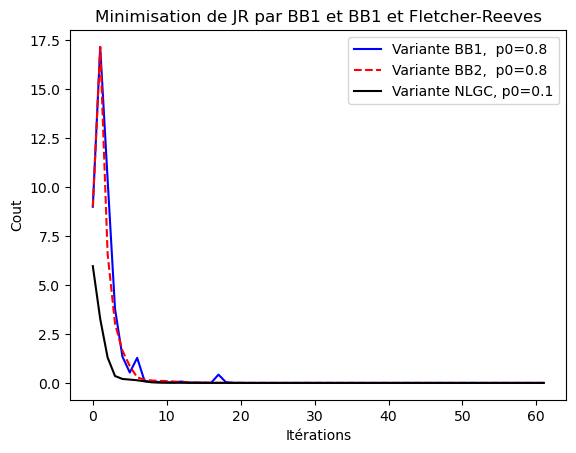

In [20]:
performance_plot_v2(JR, pas_b1=0.8, pas_b2=0.8, pas_nlgc=0.1, title="Minimisation de JR par BB1 et BB1 et Fletcher-Reeves")

**Etape 4 - Suite**

> Refaire la même chose pour la fonction $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$.
<br><br>
On a:
Gradient: $\nabla J_H(v) = \begin{bmatrix} \frac{\partial J_h}{\partial x} = 4x^3 - 4y^2 + 4xy - 4 \\  \frac{\partial J_h}{\partial y} = 4y^3 + 2x^2 + 6y - 8xy - 4 \end{bmatrix} $
Solution: $ v^* = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

In [21]:
# Fonction JH

def JH(v):
    v = np.array(v)
    n = 2

    # Cost
    value = (v[0]**2 + v[1] - 2)**2 + (v[1]**2 - 2*v[0] + 1)**2

    # Gradient
    x = v[0]
    y = v[1]
    gradient = np.array([4*(x**3-y**2+(x*y)-1), (4*(y**3) + 2*(x**2) + (6*y) - (8*x*y) - 4)])

    return {'val': value, 'grad': gradient}

[BB1] - Itération: 13	 - Vecteur u*: [1. 1.]

[BB2] - Itération: 12	 - Vecteur u*: [1. 1.]

[NLCG] - Itération: 19	 - Vecteur u*: [1. 1.]



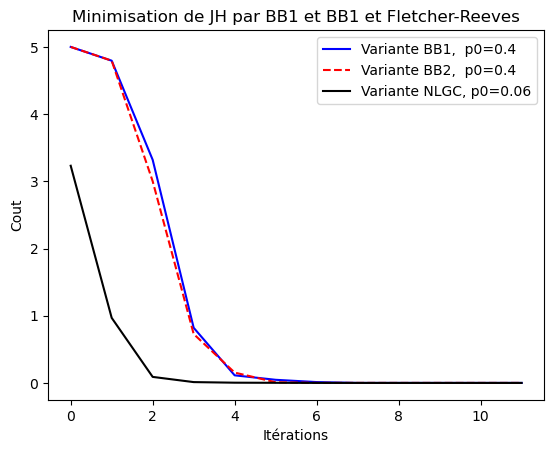

In [22]:
performance_plot_v2(JH, N=2, pas_b1=0.4, pas_b2=0.4, pas_nlgc=0.06, title="Minimisation de JH par BB1 et BB1 et Fletcher-Reeves")